<a href="https://colab.research.google.com/github/kesavan1994/Customer_convertion_prediction/blob/main/Main_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [466]:
#importing data set from github
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/kesavan1994/ML-Dataset/main/Customer_convertion_Pred_train.csv")
# df2=pd.read_csv("/content/Customer_convertion_Pred_train.csv")

In [467]:
import os
os.getcwd()


'/content'

In [468]:
df.iloc[0:5,:]


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [469]:
df.shape

(45211, 11)

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [471]:
df.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [472]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [473]:
df['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [474]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

**Data Cleaning**

In [475]:

df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [476]:
df.shape[0]

45211

In [477]:
df['education_qual'].nunique()

4

In [478]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [479]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [480]:
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [481]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [482]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [483]:
print("Highest allowed",df['dur'].mean() + 3*df['dur'].std())
print("Lowest allowed",df['dur'].mean() - 3*df['dur'].std())
print("Highest allowed",df['num_calls'].mean() + 3*df['num_calls'].std())
print("Lowest allowed",df['num_calls'].mean() - 3*df['num_calls'].std())
print("Highest allowed",df['age'].mean() + 3*df['age'].std())
print("Lowest allowed",df['age'].mean() - 3*df['age'].std())

Highest allowed 1030.746516576985
Lowest allowed -514.4203570140467
Highest allowed 12.057903308084395
Lowest allowed -6.530221991590622
Highest allowed 72.79249633725463
Lowest allowed 9.079924091402106


In [484]:
df['dur'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [ ]:
# df[(df['dur'] > 1030.74) | (df['dur'] < -514.4203570140467)]
new_df = df[(df['dur'] > 1030.74) | (df['dur'] < -514.4203570140467)]

In [485]:
upper_limit = df['dur'].mean() + 3*df['dur'].std()
lower_limit = df['dur'].mean() - 3*df['dur'].std()

In [486]:
import numpy as np

df['dur'] = np.where(
    df['dur']>upper_limit,
    upper_limit,
    np.where(
        df['dur']<lower_limit,
        lower_limit,
        df['dur']))

In [487]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [488]:
df['dur'].describe()

count    45211.000000
mean       250.772487
std        220.986371
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       1030.746517
Name: dur, dtype: float64

In [489]:
df['num_calls'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [490]:
new_df = df[(df['num_calls'] > 72) | (df['num_calls'] < 9)]

upper_limit = df['num_calls'].mean() + 3*df['num_calls'].std()
lower_limit = df['num_calls'].mean() - 3*df['num_calls'].std()

import numpy as np

df['num_calls'] = np.where(
    df['num_calls']>upper_limit,
    upper_limit,
    np.where(
        df['num_calls']<lower_limit,
        lower_limit,
        df['num_calls']))


In [491]:
df['num_calls'].describe()

count    45211.000000
mean         2.632957
std          2.319295
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         12.057903
Name: num_calls, dtype: float64

In [492]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [493]:

upper_limit = df['age'].mean() + 3*df['age'].std()
lower_limit = df['age'].mean() - 3*df['age'].std()

import numpy as np

df['age'] = np.where(
    df['age']>upper_limit,
    upper_limit,
    np.where(
        df['age']<lower_limit,
        lower_limit,
        df['age']))

In [494]:
df['age'].describe()

count    45211.000000
mean        40.889826
std         10.458640
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         72.792496
Name: age, dtype: float64

In [495]:
# label encoding yes as 1 no as 0 y column
mapping={'yes':1,'no':0}
df['Target']=df['y'].replace(mapping)

In [496]:
df['Target'].value_counts()


0    39922
1     5289
Name: Target, dtype: int64

In [497]:
df.groupby(['job'])['Target'].mean().sort_values(ascending=False)

job
student          0.286780
retired          0.227915
unemployed       0.155027
management       0.137556
admin.           0.122027
self-employed    0.118429
unknown          0.118056
technician       0.110570
services         0.088830
housemaid        0.087903
entrepreneur     0.082717
blue-collar      0.072750
Name: Target, dtype: float64

In [498]:
df.groupby(['marital'])['Target'].mean().sort_values(ascending=False)

marital
single      0.149492
divorced    0.119455
married     0.101235
Name: Target, dtype: float64

In [499]:
df.groupby(['education_qual'])['Target'].mean().sort_values(ascending=False)

education_qual
tertiary     0.150064
unknown      0.135703
secondary    0.105594
primary      0.086265
Name: Target, dtype: float64

<AxesSubplot:>

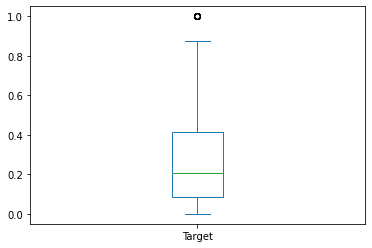

In [500]:
(df.groupby('dur')['Target'].mean()).sort_values(ascending=False).plot(kind='box')

In [501]:
df.groupby(['call_type'])['Target'].mean().sort_values(ascending=False)

call_type
cellular     0.149189
telephone    0.134205
unknown      0.040707
Name: Target, dtype: float64

In [502]:
df.groupby(['mon'])['Target'].mean().sort_values(ascending=False)

mon
mar    0.519916
dec    0.467290
sep    0.464594
oct    0.437669
apr    0.196794
feb    0.166478
aug    0.110133
jun    0.102228
nov    0.101511
jan    0.101212
jul    0.090935
may    0.067195
Name: Target, dtype: float64

In [503]:
df.groupby(['num_calls'])['Target'].mean().sort_values(ascending=False)

num_calls
1.000000     0.145976
2.000000     0.112035
3.000000     0.111936
4.000000     0.090006
11.000000    0.079602
5.000000     0.078798
6.000000     0.071263
9.000000     0.064220
7.000000     0.063946
8.000000     0.059259
10.000000    0.052632
12.057903    0.032143
12.000000    0.025806
Name: Target, dtype: float64

In [504]:
import numpy as np
df['job']=df['job'].replace('unknown',np.nan)

In [505]:
df['job']=df['job'].fillna('blue-collar')

In [506]:
import numpy as np
df['education_qual']=df['education_qual'].replace('unknown',np.nan)

In [507]:
df['education_qual']=df['education_qual'].fillna('secondary')

 **Exploratory Data analyst**

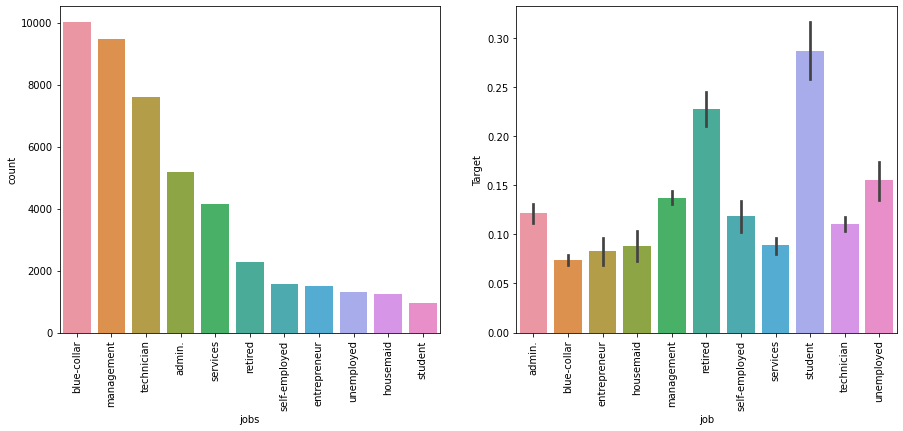

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,6))
df_j=pd.DataFrame(df.job.value_counts()).sort_values('job',ascending=False).reset_index()
df_j.rename(columns={'index':'jobs','job':'count'},inplace=True)
bar=sns.barplot(x=df_j['jobs'],y=df_j['count'],data=df_j,ax = ax[0])
bar.tick_params(axis='x',rotation=90)

df.groupby('job')['Target'].mean().sort_values(ascending=True)
bar=sns.barplot(x=df['job'].sort_values(),y='Target',data=df,ax = ax[1])
bar.tick_params(axis='x',rotation=90)

In [508]:
job={'student':0,'retired':1,'unemployed':2,'management':3,'admin.':4,'self-employed':5,'technician':6,'services':7,'housemaid':8,'entrepreneur':9,'blue-collar':10}
df['job'].replace(job,inplace=True)


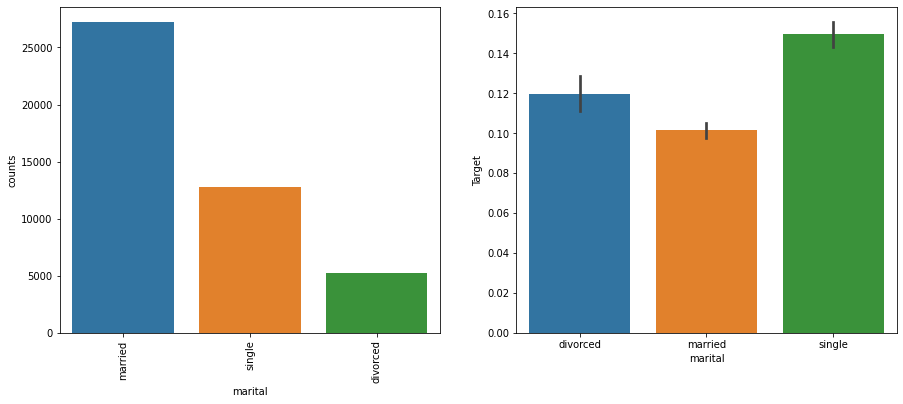

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,6))
df_m=pd.DataFrame(df.marital.value_counts()).sort_values('marital',ascending=False).reset_index()
df_m.rename(columns={'index':'marital','marital':'counts'},inplace=True)
bar=sns.barplot(x=df_m['marital'],y=df_m['counts'],data=df_m,ax = ax[0])
bar.tick_params(axis='x',rotation=90)

df.groupby('marital')['Target'].mean().sort_values(ascending=False)
bar=sns.barplot(x=df['marital'].sort_values(),y='Target',data=df,ax = ax[1])


In [509]:
mar={'single':0,'divorced':1,'married':2}
df['marital'].replace(mar,inplace=True)

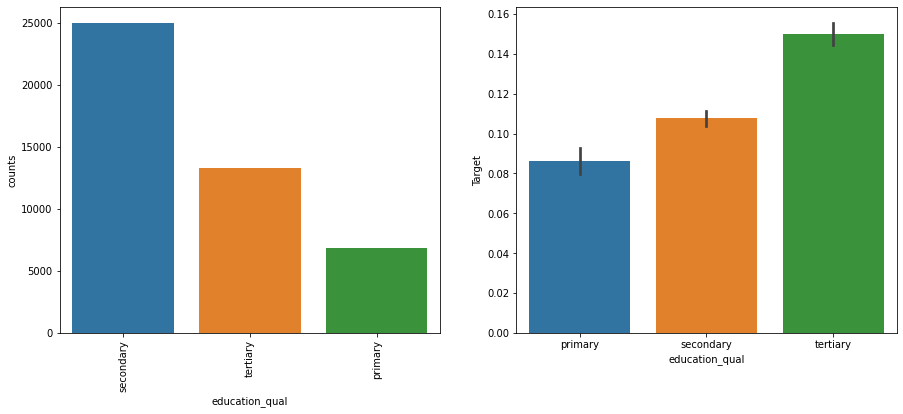

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,6))
df_e=pd.DataFrame(df.education_qual.value_counts()).sort_values('education_qual',ascending=False).reset_index()
df_e.rename(columns={'index':'education_qual','education_qual':'counts'},inplace=True)
bar=sns.barplot(x=df_e['education_qual'],y=df_e['counts'],data=df_e,ax = ax[0])
bar.tick_params(axis='x',rotation=90)

df.groupby('education_qual')['Target'].mean().sort_values(ascending=False)
bar=sns.barplot(x=df['education_qual'].sort_values(),y='Target',data=df,ax = ax[1])

In [510]:
edu_qul={'secondary':2,'tertiary':1,'primary':0}
df['education_qual'].replace(edu_qul,inplace=True)

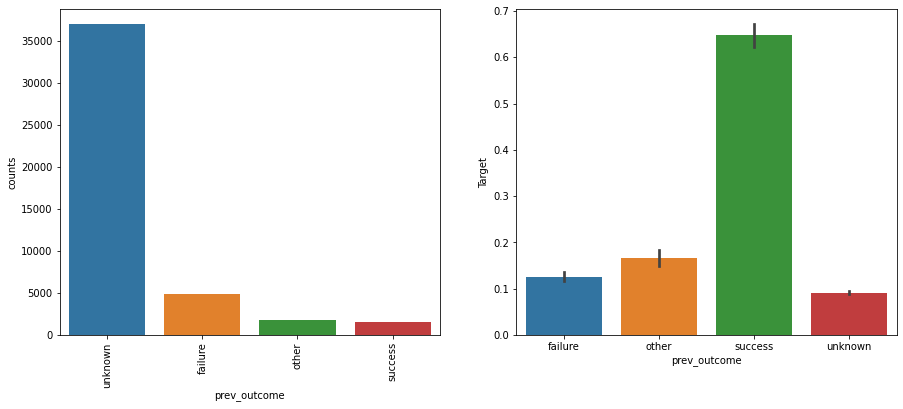

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,6))
df_e=pd.DataFrame(df.prev_outcome.value_counts()).sort_values('prev_outcome',ascending=False).reset_index()
df_e.rename(columns={'index':'prev_outcome','prev_outcome':'counts'},inplace=True)
bar=sns.barplot(x=df_e['prev_outcome'],y=df_e['counts'],data=df_e,ax = ax[0])
bar.tick_params(axis='x',rotation=90)

df.groupby('prev_outcome')['Target'].mean().sort_values(ascending=False)
bar=sns.barplot(x=df['prev_outcome'].sort_values(),y='Target',data=df,ax = ax[1])

In [511]:
prev_outcome={'success':0,'other':1,'failure':2,'unknown':3}
df['prev_outcome'].replace(prev_outcome,inplace=True)

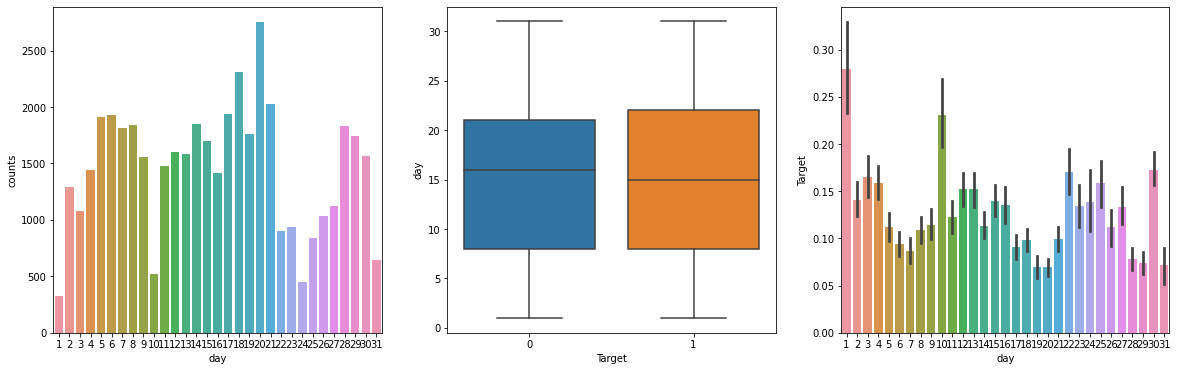

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,3,figsize=(20,6))
df_e=pd.DataFrame(df.day.value_counts()).sort_values('day',ascending=False).reset_index()
df_e.rename(columns={'index':'day','day':'counts'},inplace=True)
bar=sns.barplot(x=df_e['day'],y=df_e['counts'],data=df_e,ax = ax[0])


df.groupby('day')['Target'].mean().sort_values(ascending=False)
bar=sns.boxplot(x='Target',y=df['day'],data=df,ax= ax[1])
bar=sns.barplot(y='Target',x=df['day'],data=df,ax=ax[2])

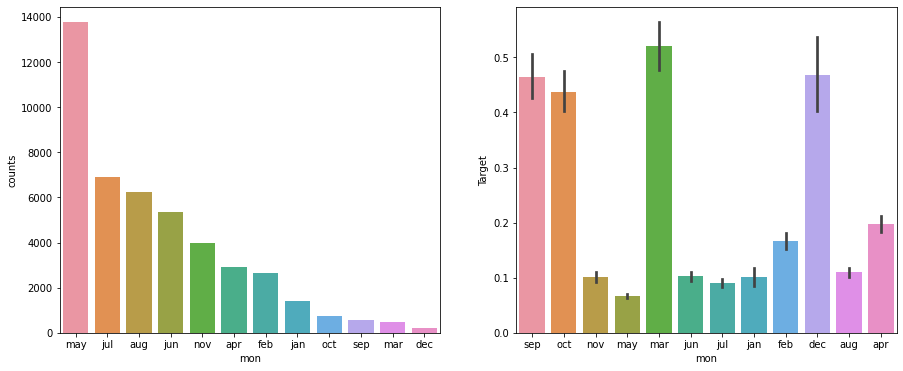

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,6))
df_e=pd.DataFrame(df.mon.value_counts()).sort_values('mon',ascending=False).reset_index()
df_e.rename(columns={'index':'mon','mon':'counts'},inplace=True)
bar=sns.barplot(x=df_e['mon'],y=df_e['counts'],data=df_e,ax = ax[0])

df.groupby('mon')['Target'].mean().sort_values(ascending=False)

bar=sns.barplot(x=df['mon'].sort_values(ascending=False),y='Target',data=df,ax = ax[1])

In [512]:
mon={'jan':6,'feb':5,'mar':0,'apr':4,'may':11,'jun':7,'jul':10,'aug':8,'sep':2,'oct':3,'nov':9,'dec':1}
df['mon'].replace(mon,inplace=True)

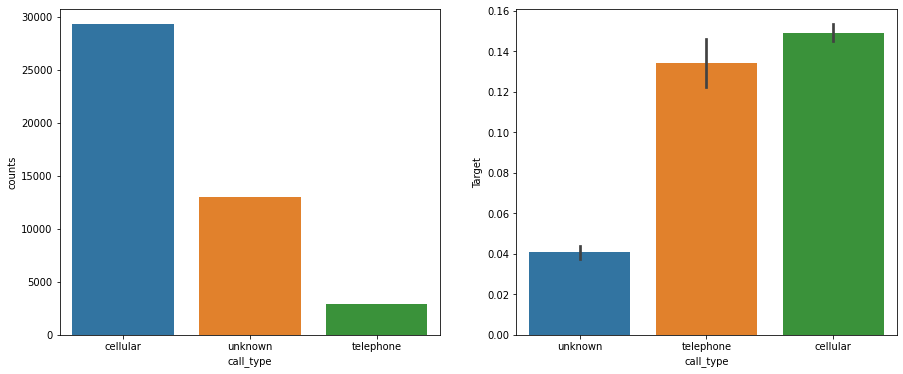

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(15,6))
df_e=pd.DataFrame(df.call_type.value_counts()).sort_values('call_type',ascending=False).reset_index()
df_e.rename(columns={'index':'call_type','call_type':'counts'},inplace=True)
bar=sns.barplot(x=df_e['call_type'],y=df_e['counts'],data=df_e,ax = ax[0])

df.groupby('call_type')['Target'].mean().sort_values(ascending=False)

bar=sns.barplot(x=df['call_type'].sort_values(ascending=False),y='Target',data=df,ax = ax[1])

In [513]:
call_type={'cellular':2,'unknown':0,'telephone':1}
df['call_type'].replace(call_type,inplace=True)

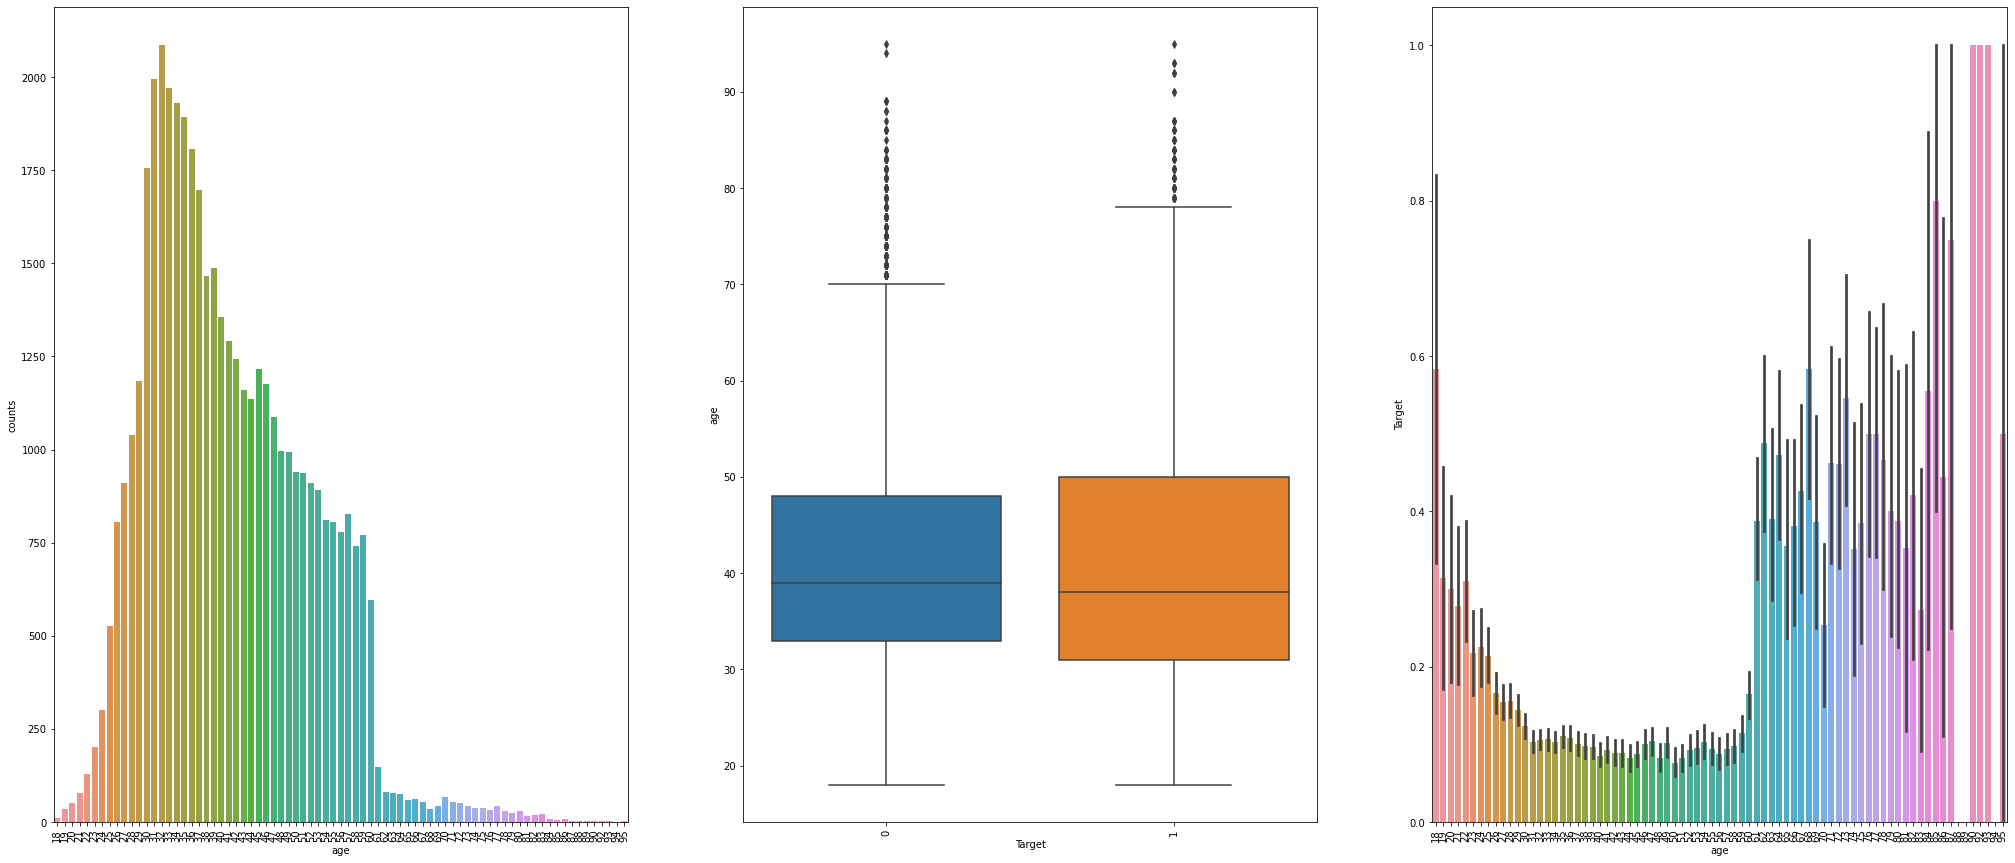

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,3,figsize=(35,15))
df_e=pd.DataFrame(df.age.value_counts()).sort_values('age',ascending=False).reset_index()
df_e.rename(columns={'index':'age','age':'counts'},inplace=True)
bar=sns.barplot(x=df_e['age'],y=df_e['counts'],data=df_e,ax = ax[0])
bar.tick_params(axis='x',rotation=90)

df.groupby('age')['Target'].mean().sort_values(ascending=False)
bar=sns.boxplot(x='Target',y=df['age'],data=df,ax= ax[1])
bar.tick_params(axis='x',rotation=90)
bar=sns.barplot(y='Target',x=df['age'],data=df,ax=ax[2])
bar.tick_params(axis='x',rotation=90)

In [514]:
mapping={'yes':1,'no':0}
df['y'].replace(mapping,inplace=True)

In [ ]:
# # import the KNNimputer class
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=3)
# After_imputation = imputer.fit_transform(df['job'])

In [434]:

df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58.0,management,married,tertiary,unknown,5,may,261.000000,1.0,unknown,0,0
1,44.0,technician,single,secondary,unknown,5,may,151.000000,1.0,unknown,0,0
2,33.0,entrepreneur,married,secondary,unknown,5,may,76.000000,1.0,unknown,0,0
3,47.0,blue-collar,married,secondary,unknown,5,may,92.000000,1.0,unknown,0,0
4,33.0,blue-collar,single,secondary,unknown,5,may,198.000000,1.0,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,cellular,17,nov,977.000000,3.0,unknown,1,1
45207,71.0,retired,divorced,primary,cellular,17,nov,456.000000,2.0,unknown,1,1
45208,72.0,retired,married,secondary,cellular,17,nov,1030.746517,5.0,success,1,1
45209,57.0,blue-collar,married,secondary,telephone,17,nov,508.000000,4.0,unknown,0,0


In [515]:
df.drop(['Target'],axis=1,inplace=True)

In [518]:
X=df[['age', 'job', 'marital', 'education_qual', 'day', 'mon','dur', 'num_calls', 'prev_outcome','call_type']].values
y=df['y'].values

In [519]:
X


array([[58.,  3.,  2., ...,  1.,  3.,  0.],
       [44.,  6.,  0., ...,  1.,  3.,  0.],
       [33.,  9.,  2., ...,  1.,  3.,  0.],
       ...,
       [72.,  1.,  2., ...,  5.,  0.,  2.],
       [57., 10.,  2., ...,  4.,  3.,  1.],
       [37.,  9.,  2., ...,  2.,  1.,  2.]])

In [438]:
# X=pd.get_dummies(X, prefix=[ 'job', 'marital', 'education_qual', 'prev_outcome','call_type','mon'])
# X

,age,day,dur,num_calls,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,prev_outcome_nov,prev_outcome_oct,prev_outcome_sep,call_type_failure,call_type_other,call_type_success,call_type_unknown,mon_cellular,mon_telephone,mon_unknown
0,58.0,5,261.000000,1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,44.0,5,151.000000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,33.0,5,76.000000,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,47.0,5,92.000000,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,33.0,5,198.000000,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,17,977.000000,3.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
45207,71.0,17,456.000000,2.0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
45208,72.0,17,1030.746517,5.0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
45209,57.0,17,508.000000,4.0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [439]:
X=X.values

In [440]:
X

array([[5.80000000e+01, 5.00000000e+00, 2.61000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.40000000e+01, 5.00000000e+00, 1.51000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.30000000e+01, 5.00000000e+00, 7.60000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [7.20000000e+01, 1.70000000e+01, 1.03074652e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.70000000e+01, 1.70000000e+01, 5.08000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.70000000e+01, 1.70000000e+01, 3.61000000e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
df

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y,Target
0,58,3,2,1,5,5,261.000000,1.0,3,0,0
1,44,6,0,2,5,5,151.000000,1.0,3,0,0
2,33,9,2,2,5,5,76.000000,1.0,3,0,0
3,47,10,2,2,5,5,92.000000,1.0,3,0,0
4,33,10,0,2,5,5,198.000000,1.0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,6,2,1,17,11,977.000000,3.0,3,1,1
45207,71,1,1,0,17,11,456.000000,2.0,3,1,1
45208,72,1,2,2,17,11,1030.746517,5.0,0,1,1
45209,57,10,2,2,17,11,508.000000,4.0,3,0,0


In [ ]:
# df.drop('call_type',axis=1,inplace=True)


In [520]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)
print('X_train : ',X_train.shape,'\nX_test : ',X_test.shape,'\ny_train : ',y_train.shape, '\ny_test : ',y_test.shape  )

X_train :  (31647, 10) 
X_test :  (13564, 10) 
y_train :  (31647,) 
y_test :  (13564,)


In [521]:
X_train

array([[32.        , 10.        ,  2.        , ...,  2.        ,
         3.        ,  0.        ],
       [58.        ,  9.        ,  2.        , ...,  2.        ,
         3.        ,  2.        ],
       [55.        , 10.        ,  2.        , ...,  3.        ,
         3.        ,  0.        ],
       ...,
       [30.        ,  2.        ,  0.        , ..., 12.05790331,
         3.        ,  0.        ],
       [28.        ,  6.        ,  0.        , ...,  5.        ,
         3.        ,  0.        ],
       [52.        ,  6.        ,  2.        , ...,  2.        ,
         3.        ,  2.        ]])

In [522]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [523]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [381]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [524]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (55828, 10)
After OverSampling, the shape of train_y: (55828,) 

After OverSampling, counts of label '1': 27914
After OverSampling, counts of label '0': 27914


In [383]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_train_res=sc.fit_transform(X_train_res)
# X_test=sc.transform(X_test)

In [525]:
y_train_res
 

array([0, 0, 0, ..., 1, 1, 1])

In [526]:
X_train_res[29]

array([ 0.38757435,  1.09944105, -0.36037255,  0.81277983,  0.5004813 ,
        0.22575749, -0.4247379 , -0.70381601,  0.41533437,  0.71290398])

In [527]:
y_train_res[29]

0

In [528]:
X_train[29]

array([ 0.38757435,  1.09944105, -0.36037255,  0.81277983,  0.5004813 ,
        0.22575749, -0.4247379 , -0.70381601,  0.41533437,  0.71290398])

In [529]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train_res,y_train_res)

LogisticRegression()

In [530]:
print(model.intercept_)
print(model.coef_)

[-1.13771257]
[[ 0.07701318 -0.36302536 -0.18578004  0.04392597 -0.01337253 -0.63031381
   1.44102379 -0.36167005 -0.47996744  0.52205792]]


In [531]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [533]:
model.predict([[ 0.38757435,  1.09944105, -0.36037255,  0.81277983,  0.5004813 ,
        0.22575749, -0.4247379 , -0.70381601,  0.41533437,  0.71290398]])


array([0])

In [534]:
score=model.score(X_test,y_test)
print(score)
print(score*100,'%')

0.8214391035092893
82.14391035092893 %


In [535]:
yhat=model.predict(X_test)
yhat

array([0, 0, 0, ..., 1, 1, 0])

In [536]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report,accuracy_score

In [537]:
confusion_matrix(y_test,yhat)

array([[9901, 2107],
       [ 315, 1241]])

In [538]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     12008
           1       0.37      0.80      0.51      1556

    accuracy                           0.82     13564
   macro avg       0.67      0.81      0.70     13564
weighted avg       0.90      0.82      0.85     13564



In [539]:
print(accuracy_score(y_test,yhat))

0.8214391035092893


In [540]:
roc_auc_score(y_test, yhat, average=None)

0.811045742427071

KNN Classifier Model

In [541]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
k=10
mean_acc=np.zeros((k-1))
std_acc=np.zeros((k-1))
ConfustionMx = [];
for n in range(1,k):
  neigh=KNeighborsClassifier(n_neighbors=n,).fit(X_train_res,y_train_res)
  yhat=neigh.predict(X_test)
  mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
  std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print(mean_acc)
print(std_acc)  
print()
score=model.score(X_test,y_test)
print(score)
print(score*100,'%')
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
print()
print('Confusion Matrix: \n',confusion_matrix(y_test,yhat))
print()
print('classification_report :\n',classification_report(y_test,yhat))
print()
print('ROC_ AUC_ Score: ',roc_auc_score(y_test, yhat, average=None))

[0.8643468  0.87135063 0.85056031 0.85749042 0.83846948 0.84569449
 0.83153937 0.84031259 0.82991743]
[0.00294012 0.00287479 0.0030612  0.00300153 0.00315993 0.00310173
 0.00321364 0.0031453  0.00322592]

0.8214391035092893
82.14391035092893 %
The best accuracy was with 0.8713506340312592 with k= 2

Confusion Matrix: 
 [[10052  1956]
 [  351  1205]]

classification_report :
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     12008
           1       0.38      0.77      0.51      1556

    accuracy                           0.83     13564
   macro avg       0.67      0.81      0.70     13564
weighted avg       0.90      0.83      0.85     13564


ROC_ AUC_ Score:  0.8057650940504102


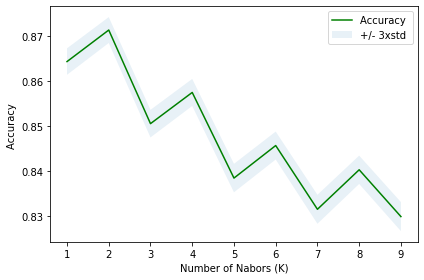

In [542]:
import matplotlib.pyplot as plt

plt.plot(range(1,k),mean_acc,'g')
plt.fill_between(range(1,k),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()




In [543]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
k=10

neigh=KNeighborsClassifier(n_neighbors=100,weights='uniform',algorithm='auto', p = 2,metric='euclidean').fit(X_train_res,y_train_res)
yhat=neigh.predict(X_test)

print()
score=model.score(X_test,y_test)
print(score)
print(score*100,'%')

print()
print('Confusion Matrix: \n',confusion_matrix(y_test,yhat))
print()
print('classification_report :\n',classification_report(y_test,yhat))
print()
print('ROC_ AUC_ Score: ',roc_auc_score(y_test, yhat, average=None))


0.8214391035092893
82.14391035092893 %

Confusion Matrix: 
 [[9701 2307]
 [ 240 1316]]

classification_report :
               precision    recall  f1-score   support

           0       0.98      0.81      0.88     12008
           1       0.36      0.85      0.51      1556

    accuracy                           0.81     13564
   macro avg       0.67      0.83      0.70     13564
weighted avg       0.91      0.81      0.84     13564


ROC_ AUC_ Score:  0.8268182180174657


SVM

In [544]:
from sklearn import svm
import itertools
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_res, y_train_res)
yhat = clf.predict(X_test)
# yhat[:5]

# clf.score(X_test, y_test)
# y_pred = clf.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y_test,yhat))
print()
print('classification_report :\n',classification_report(y_test,yhat))
print()
print('ROC_ AUC_ Score: ',roc_auc_score(y_test, yhat, average=None))

Confusion Matrix: 
 [[9784 2224]
 [ 210 1346]]

classification_report :
               precision    recall  f1-score   support

           0       0.98      0.81      0.89     12008
           1       0.38      0.87      0.53      1556

    accuracy                           0.82     13564
   macro avg       0.68      0.84      0.71     13564
weighted avg       0.91      0.82      0.85     13564


ROC_ AUC_ Score:  0.8399143501590199


In [545]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion="gini",splitter='best',max_depth=8)
model.fit(X_train_res, y_train_res)

yhat = model.predict(X_test)
# yhat[:5]

# clf.score(X_test, y_test)
# y_pred = clf.predict(X_test)

print('Confusion Matrix: \n',confusion_matrix(y_test,yhat))
print()
print('classification_report :\n',classification_report(y_test,yhat))
print()
print('ROC_ AUC_ Score: ',roc_auc_score(y_test, yhat, average=None))

Confusion Matrix: 
 [[10213  1795]
 [  353  1203]]

classification_report :
               precision    recall  f1-score   support

           0       0.97      0.85      0.90     12008
           1       0.40      0.77      0.53      1556

    accuracy                           0.84     13564
   macro avg       0.68      0.81      0.72     13564
weighted avg       0.90      0.84      0.86     13564


ROC_ AUC_ Score:  0.8118262846191656


Random forest classifier

In [546]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators= 150, criterion="gini",max_depth=7,max_features='auto')  
model.fit(X_train_res, y_train_res)

yhat = model.predict(X_test)

print('Confusion Matrix: \n',confusion_matrix(y_test,yhat))
print()
print('classification_report :\n',classification_report(y_test,yhat))
print()
print('ROC_ AUC_ Score: ',roc_auc_score(y_test, yhat, average=None))

Confusion Matrix: 
 [[10179  1829]
 [  303  1253]]

classification_report :
               precision    recall  f1-score   support

           0       0.97      0.85      0.91     12008
           1       0.41      0.81      0.54      1556

    accuracy                           0.84     13564
   macro avg       0.69      0.83      0.72     13564
weighted avg       0.91      0.84      0.86     13564


ROC_ AUC_ Score:  0.8264773998140057


In [547]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train_res, y_train_res)  

y_pred = classifier.predict(X_test)  
print('Confusion Matrix: \n',confusion_matrix(y_test,yhat))
print()
print('classification_report :\n',classification_report(y_test,yhat))
print()
print('ROC_ AUC_ Score: ',roc_auc_score(y_test, yhat, average=None))

Confusion Matrix: 
 [[10179  1829]
 [  303  1253]]

classification_report :
               precision    recall  f1-score   support

           0       0.97      0.85      0.91     12008
           1       0.41      0.81      0.54      1556

    accuracy                           0.84     13564
   macro avg       0.69      0.83      0.72     13564
weighted avg       0.91      0.84      0.86     13564


ROC_ AUC_ Score:  0.8264773998140057


In [561]:
import xgboost as xgb
x=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.75,1]

xg=xgb.XGBClassifier(learning_rate=0.1,n_estimators=19,verbosity=0,max_depth=8)
xg.fit(X_train_res,y_train_res)
  
xg.score(X_test,y_test)
yhat=xg.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y_test,yhat))
print()
print('classification_report :\n',classification_report(y_test,yhat))
print()
print('ROC_ AUC_ Score: ',roc_auc_score(y_test, yhat, average=None))

Confusion Matrix: 
 [[10516  1492]
 [  322  1234]]

classification_report :
               precision    recall  f1-score   support

           0       0.97      0.88      0.92     12008
           1       0.45      0.79      0.58      1556

    accuracy                           0.87     13564
   macro avg       0.71      0.83      0.75     13564
weighted avg       0.91      0.87      0.88     13564


ROC_ AUC_ Score:  0.8344043131485608


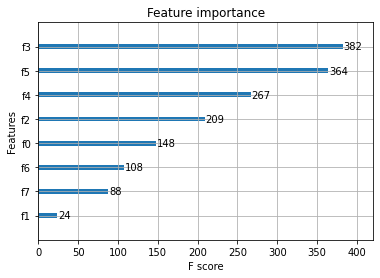

In [346]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(xg)
.show()